# P1W2D3AM - Model Improvement

> **For simplicity only, in this notebook there are no handling outliers and handling missing values. The purpose of this notebook is just to demonstrate how to use Model Improvement/Hyperparameter Tuning.**

## Import Libraries & Data Loading

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [ ]:
# Data Loading

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Iklan_sosmed.csv')
df.head()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,Laki,19,19000,0
1,15810944,Laki,35,20000,0
2,15668575,Perempuan,26,43000,0
3,15603246,Perempuan,27,57000,0
4,15804002,Laki,19,76000,0


## Exploratory Data Analysis (EDA)

In [ ]:
train,test = train_test_split(df, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (400, 5)

Col :  User ID
Length Unique Value :  400

Col :  Kelamin
Length Unique Value :  2

Col :  Usia
Length Unique Value :  43

Col :  EstimasiGaji
Length Unique Value :  117

Col :  Beli
Length Unique Value :  2



Since the number of unique value of column `User ID` is equal to the length of dataset, we can remove this feature. Also, it seems that we can't reduce the cardinality of this column  because there is no information that can be used from this column or from other columns.

## Data Preprocessing

In [ ]:
# Split between `X` (Features) and `y` (Target)

X = df.drop('Beli', axis=1)
y = df['Beli']
X.head()

,User ID,Kelamin,Usia,EstimasiGaji
0,15624510,Laki,19,19000
1,15810944,Laki,35,20000
2,15668575,Perempuan,26,43000
3,15603246,Perempuan,27,57000
4,15804002,Laki,19,76000


0    257
1    143
Name: Beli, dtype: int64



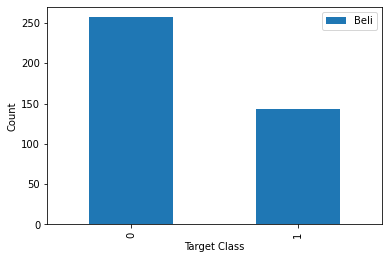

In [ ]:
# Check Target Class

print(y.value_counts())
print('')

y.value_counts().plot.bar(xlabel='Target Class', ylabel='Count', legend=True)

The dataset contains **64.25 % of class `0`** and **35.75 % of class `1`**. It's still classified as balanced dataset although the composition tends to class `0`.

In [ ]:
# Split between Train-Set and Test-Set

train,test = train_test_split(df, test_size=0.2, random_state=5)

print('Size of Train-Set : ', X_train.shape)
print('Size of Test-Set  : ', X_test.shape)

Size of Train-Set :  (320, 4)
Size of Test-Set  :  (80, 4)


In [ ]:
# Drop column `User ID`

X_train = X_train.drop('User ID', axis=1)
X_test = X_test.drop('User ID', axis=1)
X_train

,Kelamin,Usia,EstimasiGaji
213,Laki,35,58000
192,Laki,29,43000
26,Laki,49,28000
195,Laki,34,43000
252,Perempuan,48,134000
...,...,...,...
175,Perempuan,23,28000
215,Perempuan,60,108000
64,Perempuan,59,83000
21,Perempuan,47,49000


In [ ]:
# Split between Numerical Columns and Categorical Columns

X_train_num = X_train[['Usia', 'EstimasiGaji']]
X_test_num = X_test[['Usia', 'EstimasiGaji']]

X_train_cat = X_train[['Kelamin']]
X_test_cat = X_test[['Kelamin']]

In [ ]:
# Feature Scaling & Feature Encoding

minmax = MinMaxScaler()
ohe = OneHotEncoder()

minmax.fit(X_train_num)
ohe.fit(X_train_cat)

X_train_num = minmax.transform(X_train_num)
X_test_num = minmax.transform(X_test_num)

X_train_cat = ohe.transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

In [ ]:
# Merge Numerical Columns and Categorical Columns

X_train_final = np.concatenate([X_train_num, X_train_cat.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat.toarray()], axis=1)
X_train_final

array([[0.4047619 , 0.31851852, 1.        , 0.        ],
       [0.26190476, 0.20740741, 1.        , 0.        ],
       [0.73809524, 0.0962963 , 1.        , 0.        ],
       ...,
       [0.97619048, 0.5037037 , 0.        , 1.        ],
       [0.69047619, 0.25185185, 0.        , 1.        ],
       [0.47619048, 0.26666667, 1.        , 0.        ]])

## Modeling

Let's create baseline model. Baseline model is a model that is trained using default parameters

In [ ]:
# Baseline Model using Random Forest Algorithm

rf = RandomForestClassifier()
rf.fit(X_train_final, y_train)

RandomForestClassifier()

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       114

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320
 

Confusion Matrix      : 


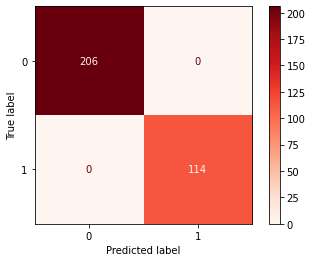

In [ ]:
# Check Performance Model against Train-Set

y_pred_train = rf.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

## Cross Validation

Wow ! Our model achieve 100% on F1-Score for the training-set. 

* Is this just a coincidence? 
* Is this score valid? 
* How if the model gets data that is easy to learn on the train-set while later on the test-set contain data that is difficult to learn/predict?

To answer these questions, we are gonna use Cross Validation. Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. Cross-validation provides performance measurements such as mean and standard deviation.

* Mean : **how well** the procedure performs on average.
* Standard deviation : **how much** the procedure is expected to vary in practice.

Mean and standard deviation can be used to give a confidence interval on the expected performance on a machine learning procedure in practice.

In [ ]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.92523364 0.88785047 0.88679245]
Accuracy - Mean - Cross Validation :  0.8999588549932405
Accuracy - Std - Cross Validation  :  0.01787719405180234
Accuracy - Range of Test-Set       :  0.8820816609414381 - 0.9178360490450428
CPU times: user 469 ms, sys: 6.07 ms, total: 475 ms
Wall time: 482 ms


Accuracy - Test Set   :  0.9 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.89      0.83      0.86        29

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80
 

Confusion Matrix      : 


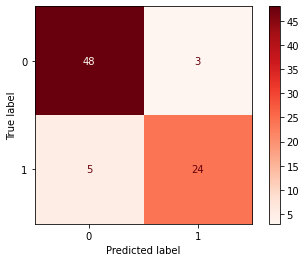

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final, y_test, cmap='Reds'))

## Model Optimization (Hyperparameter Tuning)

### Manual Search

In [ ]:
# Hyperparameter Tuning : Manual Search

%%time

rf_ms_1 = RandomForestClassifier(n_estimators=300,
                                 criterion='entropy',
                                 max_features='sqrt',
                                 min_samples_leaf=10)
rf_ms_1.fit(X_train_final, y_train)

CPU times: user 446 ms, sys: 102 µs, total: 446 ms
Wall time: 452 ms


Accuracy - Train Set  :  0.921875 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       206
           1       0.85      0.95      0.90       114

    accuracy                           0.92       320
   macro avg       0.91      0.93      0.92       320
weighted avg       0.93      0.92      0.92       320
 

Confusion Matrix      : 


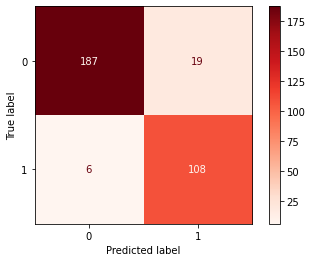

In [ ]:
# Check Performance Model against Train-Set

y_pred_train = rf_ms_1.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_final, y_train, cmap='Reds'))

In [ ]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(rf_ms_1, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.95327103 0.91588785 0.88679245]
Accuracy - Mean - Cross Validation :  0.9186504437782871
Accuracy - Std - Cross Validation  :  0.027209975888095757
Accuracy - Range of Test-Set       :  0.8914404678901914 - 0.9458604196663828
CPU times: user 1.41 s, sys: 24.5 ms, total: 1.43 s
Wall time: 1.43 s


We can see that the mean-accuracy of Cross Validation from model `rf_ms_1` (with new hyperparameter) is higher than model `rf` (using default parameter). 

We also can expect that the performance of test-set using `rf_ms_1` is higher (or at least still in range) than `rf`. Let's prove this!

Accuracy - Test Set   :  0.9 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80
 

Confusion Matrix      : 


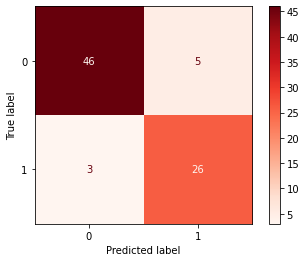

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf_ms_1.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_final, y_test, cmap='Reds'))

### Random Search

In [ ]:
# Hyperparameter Tuning : Random Search

from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'criterion': ['entropy', 'gini'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 14],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Train with Random Search
%%time

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1)
rf_randomcv.fit(X_train_final, y_train)

CPU times: user 3.02 s, sys: 272 ms, total: 3.29 s
Wall time: 5min 24s


In [ ]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

Accuracy - Test Set   :  0.9 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80
 

Confusion Matrix      : 


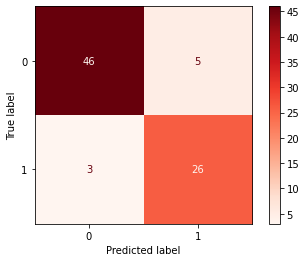

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test, cmap='Reds'))

### Grid Search

In [ ]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Reuse best hyperparameters from Random Search for efficiency
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, 
                     rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, 
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

param_grid

{'criterion': ['gini'],
 'max_depth': [230],
 'max_features': ['sqrt'],
 'min_samples_leaf': [6, 8, 10],
 'min_samples_split': [8, 9, 10, 11, 12],
 'n_estimators': [0, 100, 200, 300, 400]}

In [ ]:
# Display Best Hyperparamters from Random Search

rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
# Train with Grid Search
%%time

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 2.26 s, sys: 116 ms, total: 2.38 s
Wall time: 1min 34s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.

  

In [ ]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

Accuracy - Test Set   :  0.9 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80
 

Confusion Matrix      : 


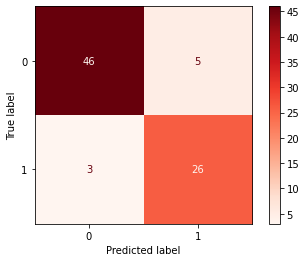

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_final, y_test, cmap='Reds'))